# FOREX trading prediction


## Segment 1: Import Necessary Libraries

#In this segment, we import the essential libraries for data manipulation (NumPy, Pandas)
#fetching forex data (yfinance), data visualization (Matplotlib), and machine learning (scikit-learn).


In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Segment 2: Download Historical Forex Data

This segment uses the yfinance library to download historical forex data for the EUR/USD currency pair from January 1, 2010, to December 31, 2021.

In [4]:
# Download historical forex data (e.g., EUR/USD) from Yahoo Finance
forex_data = yf.download('EURUSD=X', start='2010-01-01', end='2021-12-31')


[*********************100%***********************]  1 of 1 completed


# Segment 3: Calculate Daily Returns
    Here, daily returns are calculated by taking the percentage change of the adjusted closing prices of the forex pair.

In [5]:
# Calculate daily returns
forex_data['Return'] = forex_data['Adj Close'].pct_change()


# Segment 4: Drop Missing Values
    Any rows with missing values (NaN) in the dataset are removed in this segment.

In [6]:
# Drop missing values
forex_data = forex_data.dropna()


# Segment 5: Prepare Data for Prediction
In this segment, we create a feature 'Prev_Return' by shifting the 'Return' column by one day. This allows us to use the previous day's return as a feature for predicting the current day's return.    

In [ ]:
# Prepare data for prediction (use previous day's return as a feature)
forex_data['Prev_Return'] = forex_data['Return'].shift(1)
forex_data = forex_data.dropna() 


# Segment 6: Split Data into Training and Testing Sets
    The dataset is divided into training and testing sets. The 'Prev_Return' feature is stored in X, and the target variable 'Return' is stored in y. We use train_test_split to split the data, reserving 20% of it for testing.

In [8]:
# Split the data into training and testing sets
X = forex_data[['Prev_Return']].values
y = forex_data['Return'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Segment 7: Create and Train a Linear Regression Model
    Here, we create a linear regression model and train it using the training data.

In [9]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# Segment 8: Make Predictions on the Test Set
    We use the trained model to make predictions on the test set.

In [10]:
# Make predictions on the test set
y_pred = model.predict(X_test)


# Segment 9: Calculate Model Performance Metrics
    Performance metrics, including Mean Squared Error (MSE) and R-squared (R2), are calculated to evaluate the model's accuracy.

In [11]:
# Calculate model performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Segment 10: Print Model Statistics
    The code prints out the calculated model statistics, which provide insight into how well the model performed

In [12]:
# Print model statistics
print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')


Mean Squared Error: 0.0000
R-squared: 0.0002


# Segment 11: Plot Actual vs. Predicted Returns
    This segment generates a scatter plot that shows the actual returns in blue and the predicted returns in red. It provides a visual representation of how well the model's predictions align with the actual data

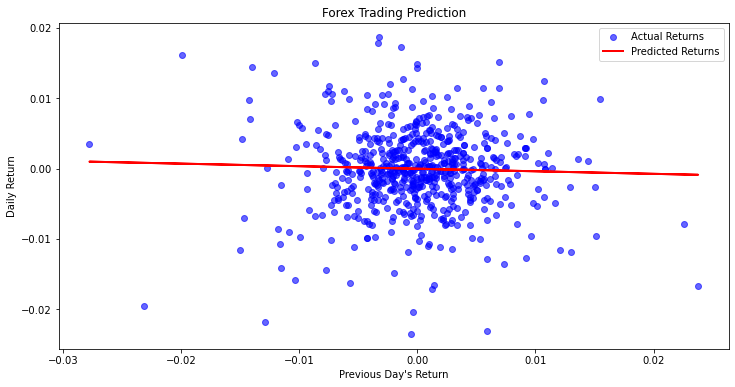

In [13]:
# Plot actual vs. predicted returns
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Returns', alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Returns')
plt.xlabel('Previous Day\'s Return')
plt.ylabel('Daily Return')
plt.title('Forex Trading Prediction')
plt.legend()
plt.show()
